In [ ]:
# Cell 1: Install Dependencies
!pip install rasterio tqdm pillow shapely geopandas -q

print("✅ Dependencies installed!")
print("\nInstalled packages:")
print("  - rasterio: Read/write GeoTIFF files")
print("  - tqdm: Progress bars")
print("  - pillow: Image processing")
print("  - shapely: Geometry operations for GeoJSON")
print("  - geopandas: Parse GeoJSON building footprints")

✅ Dependencies installed!

Installed packages:
  - rasterio: Read/write GeoTIFF files
  - tqdm: Progress bars
  - pillow: Image processing
  - shapely: Geometry operations for GeoJSON
  - geopandas: Parse GeoJSON building footprints


In [1]:
# Cell 2: Mount Google Drive
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

print("✅ Google Drive mounted successfully!")
print(f"   Location: /content/drive/MyDrive/")

# Check if we have space
import shutil
total, used, free = shutil.disk_usage("/content/drive")
print(f"\n💾 Google Drive Storage:")
print(f"   Total: {total // (2**30)} GB")
print(f"   Used: {used // (2**30)} GB")
print(f"   Free: {free // (2**30)} GB")

# Check Colab disk space
total_colab, used_colab, free_colab = shutil.disk_usage("/content")
print(f"\n💾 Colab Local Storage:")
print(f"   Total: {total_colab // (2**30)} GB")
print(f"   Free: {free_colab // (2**30)} GB")
print(f"   (Temporary - will be deleted after session ends)")

Mounted at /content/drive
✅ Google Drive mounted successfully!
   Location: /content/drive/MyDrive/

💾 Google Drive Storage:
   Total: 225 GB
   Used: 47 GB
   Free: 178 GB

💾 Colab Local Storage:
   Total: 225 GB
   Free: 187 GB
   (Temporary - will be deleted after session ends)


In [ ]:
# Cell 3: Setup Kaggle API
import os

# Create kaggle directory
!mkdir -p ~/.kaggle

# Upload kaggle.json file
from google.colab import files

print("📤 Please upload your kaggle.json file:")
print("   (Download from: Kaggle → Account → API → Create New API Token)")
print()

uploaded = files.upload()

# Move kaggle.json to correct location
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("\n✅ Kaggle API configured successfully!")
print("   Credentials stored at: ~/.kaggle/kaggle.json")

# Verify it works
print("\n🔍 Testing Kaggle API connection...")
!kaggle datasets list --sort-by votes | head -5

print("\n✅ Kaggle API is working!")

📤 Please upload your kaggle.json file:
   (Download from: Kaggle → Account → API → Create New API Token)



Saving kaggle.json to kaggle.json

✅ Kaggle API configured successfully!
   Credentials stored at: ~/.kaggle/kaggle.json

🔍 Testing Kaggle API connection...
ref                                                           title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jessicali9530/animal-crossing-new-horizons-nookplaza-dataset  Animal Crossing New Horizons Catalog                     590770  2021-06-08 15:05:09.513000          83101      55775  0.88235295       
mlg-ulb/creditcardfraud                                       Credit Card Fraud Detection                            69155672  2018-03-23 01:17:27.913000        1045754      12692  0.85294116       
allen-institute-for-ai/CORD-19-research-challen

In [ ]:
# Cell 4: Download SpaceNet 7 Dataset
import os
from pathlib import Path

# Create directory for raw dataset
!mkdir -p /content/spacenet7_raw

print("📥 Downloading SpaceNet 7 Dataset...")
print("   This will take 15-30 minutes (24 GB download)")
print("   Progress will be shown below\n")

# Download the dataset
!kaggle datasets download -d amerii/spacenet-7-multitemporal-urban-development -p /content/spacenet7_raw

print("\n📦 Extracting train data only...")
print("   (Extracting SN7_buildings_train folder)")

# Extract only the train folder
!unzip -q /content/spacenet7_raw/spacenet-7-multitemporal-urban-development.zip "SN7_buildings_train/*" -d /content/spacenet7_raw/

print("\n🗑️ Removing zip file to free up space...")
!rm /content/spacenet7_raw/spacenet-7-multitemporal-urban-development.zip

# Verify extraction
train_path = Path('/content/spacenet7_raw/SN7_buildings_train/train')

if train_path.exists():
    area_count = len([d for d in train_path.iterdir() if d.is_dir()])
    print(f"\n✅ Dataset extracted successfully!")
    print(f"   Location: {train_path}")
    print(f"   Found {area_count} area folders")

    # Show first 5 areas
    print(f"\n   First 5 areas:")
    for area in sorted(train_path.iterdir())[:5]:
        if area.is_dir():
            print(f"     - {area.name}")

    # Check one area structure
    first_area = sorted([d for d in train_path.iterdir() if d.is_dir()])[0]
    print(f"\n   Checking structure of: {first_area.name}")
    for folder in sorted(first_area.iterdir()):
        if folder.is_dir():
            file_count = len(list(folder.glob('*')))
            print(f"     ✅ {folder.name:20s}: {file_count} files")
else:
    print("\n❌ Error: Train folder not found!")
    print("   Checking what was extracted...")
    !ls -la /content/spacenet7_raw/

print("\n" + "="*70)
print("✅ Download and extraction complete!")
print("="*70)

📥 Downloading SpaceNet 7 Dataset...
   This will take 15-30 minutes (24 GB download)
   Progress will be shown below

Dataset URL: https://www.kaggle.com/datasets/amerii/spacenet-7-multitemporal-urban-development
License(s): CC-BY-NC-SA-4.0
 99% 10.3G/10.3G [00:26<00:00, 405MB/s]
100% 10.3G/10.3G [00:27<00:00, 410MB/s]

📦 Extracting train data only...
   (Extracting SN7_buildings_train folder)

🗑️ Removing zip file to free up space...

✅ Dataset extracted successfully!
   Location: /content/spacenet7_raw/SN7_buildings_train/train
   Found 60 area folders

   First 5 areas:
     - L15-0331E-1257N_1327_3160_13
     - L15-0357E-1223N_1429_3296_13
     - L15-0358E-1220N_1433_3310_13
     - L15-0361E-1300N_1446_2989_13
     - L15-0368E-1245N_1474_3210_13

   Checking structure of: L15-0331E-1257N_1327_3160_13
     ✅ images              : 25 files
     ✅ images_masked       : 25 files
     ✅ labels              : 50 files
     ✅ labels_match        : 25 files
     ✅ labels_match_pix    : 25 

In [ ]:
# Cell 5: Image and Mask Preprocessing Functions
import rasterio
from rasterio.transform import from_bounds
from rasterio.features import rasterize
import numpy as np
from PIL import Image
from pathlib import Path
import geopandas as gpd
import json
from shapely.geometry import shape

# =============================================================================
# FUNCTION 1: Preprocess Satellite Images (TIF)
# =============================================================================
def preprocess_tif_image(input_path, output_path, target_size=(512, 512)):
    """
    Preprocess satellite image for GAN training.

    Steps:
    1. Load RGBA GeoTIFF
    2. Extract RGB (drop alpha channel)
    3. Pad non-square to square
    4. Resize to 512×512 (bicubic interpolation)
    5. Save as compressed GeoTIFF (uint8 [0-255])

    Args:
        input_path: Path to input .tif file
        output_path: Path to save preprocessed .tif
        target_size: Output dimensions (default: 512×512)
    """
    # Read input GeoTIFF
    with rasterio.open(input_path) as src:
        image = src.read()  # Shape: (bands, H, W)
        profile = src.profile.copy()
        original_crs = src.crs
        original_bounds = src.bounds

    # Transpose to (H, W, bands)
    image = np.transpose(image, (1, 2, 0))

    # Extract RGB only (first 3 channels)
    if image.shape[2] >= 3:
        rgb = image[:, :, :3]
    else:
        rgb = image

    # Pad to square if needed
    h, w = rgb.shape[:2]
    if h != w:
        max_dim = max(h, w)
        padded = np.zeros((max_dim, max_dim, 3), dtype=np.uint8)
        padded[:h, :w, :] = rgb
        rgb = padded

    # Resize using bicubic interpolation
    pil_img = Image.fromarray(rgb)
    pil_img = pil_img.resize(target_size, Image.BICUBIC)
    rgb_resized = np.array(pil_img).astype(np.uint8)

    # Transpose back to (C, H, W)
    rgb_output = np.transpose(rgb_resized, (2, 0, 1))

    # Update profile
    profile.update({
        'driver': 'GTiff',
        'height': target_size[0],
        'width': target_size[1],
        'count': 3,
        'dtype': 'uint8',
        'compress': 'lzw',
        'crs': original_crs,
        'transform': from_bounds(
            original_bounds.left,
            original_bounds.bottom,
            original_bounds.right,
            original_bounds.top,
            target_size[1],
            target_size[0]
        )
    })

    # Create output directory
    output_path.parent.mkdir(parents=True, exist_ok=True)

    # Write output
    with rasterio.open(output_path, 'w', **profile) as dst:
        dst.write(rgb_output)

# =============================================================================
# FUNCTION 2: Convert GeoJSON to Building Mask
# =============================================================================
def geojson_to_mask(geojson_path, output_path, target_size=(512, 512)):
    """
    Convert GeoJSON building footprints to binary mask.

    Steps:
    1. Read GeoJSON building polygons (labels_match format)
    2. Rasterize polygons to binary mask
    3. Resize to 512×512
    4. Save as .npy (float32, [0, 1])

    Args:
        geojson_path: Path to .geojson file
        output_path: Path to save mask (.npy)
        target_size: Output dimensions (default: 512×512)

    Returns:
        True if successful, False if error
    """
    try:
        # Read GeoJSON
        with open(geojson_path, 'r') as f:
            geojson_data = json.load(f)

        # Extract features (building polygons)
        features = geojson_data.get('features', [])

        if not features:
            # No buildings - create empty mask
            mask = np.zeros(target_size, dtype=np.float32)
            output_path.parent.mkdir(parents=True, exist_ok=True)
            np.save(output_path, mask)
            return True

        # Get image dimensions from first feature's properties (if available)
        # SpaceNet GeoJSON in labels_match is in EPSG:3857 (image CRS)

        # Parse geometries
        geometries = []
        for feature in features:
            geom = feature.get('geometry')
            if geom and geom['type'] != 'GeometryCollection':
                try:
                    poly = shape(geom)
                    if poly.is_valid and not poly.is_empty:
                        geometries.append(poly)
                except Exception:
                    continue

        if not geometries:
            # No valid geometries - empty mask
            mask = np.zeros(target_size, dtype=np.float32)
            output_path.parent.mkdir(parents=True, exist_ok=True)
            np.save(output_path, mask)
            return True

        # Get bounds from all geometries
        gdf = gpd.GeoDataFrame(geometry=geometries, crs='EPSG:3857')
        bounds = gdf.total_bounds  # [minx, miny, maxx, maxy]

        # Calculate transform for rasterization
        # Original images are ~1024×1024, we need to rasterize at that size first
        original_size = 1024
        transform = from_bounds(
            bounds[0], bounds[1], bounds[2], bounds[3],
            original_size, original_size
        )

        # Rasterize at original resolution
        mask_original = rasterize(
            [(geom, 1) for geom in geometries],
            out_shape=(original_size, original_size),
            transform=transform,
            fill=0,
            dtype=np.uint8
        )

        # Resize to target size
        mask_pil = Image.fromarray(mask_original)
        mask_pil = mask_pil.resize(target_size, Image.NEAREST)  # Use NEAREST for binary masks
        mask_resized = np.array(mask_pil)

        # Convert to float32 [0, 1]
        mask_float = mask_resized.astype(np.float32)
        mask_float = np.clip(mask_float, 0, 1)  # Ensure [0, 1] range

        # Save as .npy
        output_path.parent.mkdir(parents=True, exist_ok=True)
        np.save(output_path, mask_float)

        return True

    except Exception as e:
        print(f"    ❌ Error processing {geojson_path.name}: {e}")
        # Create empty mask on error
        mask = np.zeros(target_size, dtype=np.float32)
        output_path.parent.mkdir(parents=True, exist_ok=True)
        np.save(output_path, mask)
        return False

# =============================================================================
# TEST THE FUNCTIONS
# =============================================================================
print("🧪 Testing preprocessing functions...\n")

from pathlib import Path

train_path = Path('/content/spacenet7_raw/SN7_buildings_train/train')
test_area = sorted([d for d in train_path.iterdir() if d.is_dir()])[0]

print(f"Test area: {test_area.name}\n")

# Test image preprocessing
print("1️⃣ Testing image preprocessing (images_masked)...")
test_img_input = sorted(list((test_area / 'images_masked').glob('*.tif')))[0]
test_img_output = Path('/content/test_image.tif')

preprocess_tif_image(test_img_input, test_img_output)

with rasterio.open(test_img_output) as src:
    print(f"   ✅ Input: {test_img_input.name}")
    print(f"   ✅ Output shape: ({src.count}, {src.height}, {src.width})")
    print(f"   ✅ Bands: {src.count} (RGB)")
    print(f"   ✅ Size: {src.height}×{src.width}")
    print(f"   ✅ Data type: {src.dtypes[0]}")

test_img_output.unlink()  # Clean up

# Test mask generation
print(f"\n2️⃣ Testing mask generation from GeoJSON...")
test_geojson = sorted(list((test_area / 'labels_match').glob('*.geojson')))[0]
test_mask_output = Path('/content/test_mask.npy')

success = geojson_to_mask(test_geojson, test_mask_output)

if success and test_mask_output.exists():
    mask = np.load(test_mask_output)
    print(f"   ✅ Input: {test_geojson.name}")
    print(f"   ✅ Output shape: {mask.shape}")
    print(f"   ✅ Data type: {mask.dtype}")
    print(f"   ✅ Value range: [{mask.min():.3f}, {mask.max():.3f}]")
    print(f"   ✅ Building pixels: {(mask > 0).sum()} ({(mask > 0).sum() / mask.size * 100:.2f}%)")

    test_mask_output.unlink()  # Clean up
else:
    print(f"   ⚠️ Mask generation failed")

print(f"\n{'='*70}")
print(f"✅ All preprocessing functions tested successfully!")
print(f"{'='*70}")

🧪 Testing preprocessing functions...

Test area: L15-0331E-1257N_1327_3160_13

1️⃣ Testing image preprocessing (images_masked)...
   ✅ Input: global_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13.tif
   ✅ Output shape: (3, 512, 512)
   ✅ Bands: 3 (RGB)
   ✅ Size: 512×512
   ✅ Data type: uint8

2️⃣ Testing mask generation from GeoJSON...
   ✅ Input: global_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13_Buildings.geojson
   ✅ Output shape: (512, 512)
   ✅ Data type: float32
   ✅ Value range: [0.000, 1.000]
   ✅ Building pixels: 8083 (3.08%)

✅ All preprocessing functions tested successfully!


In [ ]:
# Cell 6: Process All 60 Areas - Images + Masks
import shutil
from pathlib import Path
from tqdm import tqdm
import time

# Paths
input_base = Path('/content/spacenet7_raw/SN7_buildings_train/train')
output_base = Path('/content/drive/MyDrive/spacenet7_preprocessed_gan')

# Create output directory
output_base.mkdir(parents=True, exist_ok=True)

# Get all area directories
area_dirs = sorted([d for d in input_base.iterdir() if d.is_dir()])

print(f"{'='*70}")
print(f"🚀 SPACENET 7 FULL PREPROCESSING PIPELINE")
print(f"{'='*70}")
print(f"  Input:  {input_base}")
print(f"  Output: {output_base}")
print(f"  Total areas: {len(area_dirs)}")
print(f"\n📋 Processing Plan:")
print(f"  ✅ Preprocess images/ folder (raw RGB images)")
print(f"  ✅ Preprocess images_masked/ folder (cloud-masked RGB images)")
print(f"  ✅ Generate building_masks/ folder (from labels_match GeoJSON)")
print(f"  ✅ Copy labels/, labels_match/, labels_match_pix/ (unchanged)")
print(f"{'='*70}\n")

# Statistics
stats = {
    'areas_processed': 0,
    'areas_skipped': 0,
    'images_preprocessed': 0,
    'images_masked_preprocessed': 0,
    'masks_generated': 0,
    'files_copied': 0,
    'errors': []
}

start_time = time.time()

# Process each area
for area_idx, area_dir in enumerate(tqdm(area_dirs, desc="Processing Areas"), 1):
    area_name = area_dir.name
    output_area = output_base / area_name

    try:
        # Create area output directory
        output_area.mkdir(exist_ok=True)

        # =====================================================================
        # 1. COPY LABEL FOLDERS (unchanged GeoJSON)
        # =====================================================================
        folders_to_copy = ['labels', 'labels_match', 'labels_match_pix']

        for folder_name in folders_to_copy:
            input_folder = area_dir / folder_name
            output_folder = output_area / folder_name

            if input_folder.exists():
                if output_folder.exists():
                    shutil.rmtree(output_folder)
                shutil.copytree(input_folder, output_folder)
                stats['files_copied'] += len(list(output_folder.glob('*')))

        # =====================================================================
        # 2. PREPROCESS images/ FOLDER (raw images)
        # =====================================================================
        input_images = area_dir / 'images'
        output_images = output_area / 'images'

        if input_images.exists():
            output_images.mkdir(exist_ok=True)

            for img_path in input_images.glob('*.tif'):
                # Extract date: global_monthly_YYYY_MM_mosaic_...tif
                parts = img_path.name.split('_')
                year = parts[2]
                month = parts[3]
                output_name = f"{year}_{month}.tif"
                output_path = output_images / output_name

                try:
                    preprocess_tif_image(img_path, output_path, target_size=(512, 512))
                    stats['images_preprocessed'] += 1
                except Exception as e:
                    stats['errors'].append(f"{area_name}/images/{img_path.name}: {str(e)}")

        # =====================================================================
        # 3. PREPROCESS images_masked/ FOLDER (cloud-masked images)
        # =====================================================================
        input_images_masked = area_dir / 'images_masked'
        output_images_masked = output_area / 'images_masked'

        if input_images_masked.exists():
            output_images_masked.mkdir(exist_ok=True)

            for img_path in input_images_masked.glob('*.tif'):
                # Extract date
                parts = img_path.name.split('_')
                year = parts[2]
                month = parts[3]
                output_name = f"{year}_{month}.tif"
                output_path = output_images_masked / output_name

                try:
                    preprocess_tif_image(img_path, output_path, target_size=(512, 512))
                    stats['images_masked_preprocessed'] += 1
                except Exception as e:
                    stats['errors'].append(f"{area_name}/images_masked/{img_path.name}: {str(e)}")

        # =====================================================================
        # 4. GENERATE building_masks/ FROM labels_match/ GeoJSON
        # =====================================================================
        input_labels_match = area_dir / 'labels_match'
        output_masks = output_area / 'building_masks'

        if input_labels_match.exists():
            output_masks.mkdir(exist_ok=True)

            for geojson_path in input_labels_match.glob('*.geojson'):
                # Extract date from GeoJSON filename
                # Format: global_monthly_YYYY_MM_mosaic_..._Buildings.geojson
                parts = geojson_path.name.split('_')
                year = parts[2]
                month = parts[3]
                output_name = f"{year}_{month}.npy"
                output_path = output_masks / output_name

                try:
                    success = geojson_to_mask(geojson_path, output_path, target_size=(512, 512))
                    if success:
                        stats['masks_generated'] += 1
                except Exception as e:
                    stats['errors'].append(f"{area_name}/building_masks/{geojson_path.name}: {str(e)}")

        stats['areas_processed'] += 1

        # Print progress every 10 areas
        if area_idx % 10 == 0:
            elapsed = time.time() - start_time
            avg_time = elapsed / area_idx
            remaining = (len(area_dirs) - area_idx) * avg_time
            print(f"\n  Progress: {area_idx}/{len(area_dirs)} | "
                  f"Elapsed: {elapsed/60:.1f}min | "
                  f"ETA: {remaining/60:.1f}min | "
                  f"Masks: {stats['masks_generated']}")

    except Exception as e:
        stats['areas_skipped'] += 1
        stats['errors'].append(f"CRITICAL - {area_name}: {str(e)}")
        print(f"\n❌ Critical error in {area_name}: {e}")

# Calculate total time
total_time = time.time() - start_time

# =========================================================================
# FINAL STATISTICS
# =========================================================================
print(f"\n{'='*70}")
print(f"✅ PREPROCESSING COMPLETE!")
print(f"{'='*70}")
print(f"\n📊 Processing Summary:")
print(f"  ✅ Areas processed: {stats['areas_processed']}/{len(area_dirs)}")
print(f"  ⚠️  Areas skipped: {stats['areas_skipped']}")

print(f"\n📸 Image Processing:")
print(f"  ✅ images/ folder: {stats['images_preprocessed']} images")
print(f"  ✅ images_masked/ folder: {stats['images_masked_preprocessed']} images")
print(f"  ✅ Total RGB images: {stats['images_preprocessed'] + stats['images_masked_preprocessed']}")

print(f"\n🏢 Building Masks:")
print(f"  ✅ building_masks/ generated: {stats['masks_generated']} masks")

print(f"\n📄 Files Copied:")
print(f"  ✅ Label files (GeoJSON): {stats['files_copied']} files")

print(f"\n⏱️  Processing Time:")
print(f"  Total: {total_time/60:.1f} minutes ({total_time/3600:.2f} hours)")
print(f"  Average per area: {total_time/len(area_dirs):.1f} seconds")

# Show errors if any
if stats['errors']:
    print(f"\n⚠️  Errors: {len(stats['errors'])}")
    print(f"  First 5 errors:")
    for error in stats['errors'][:5]:
        print(f"    - {error}")
    if len(stats['errors']) > 5:
        print(f"    ... and {len(stats['errors']) - 5} more")
else:
    print(f"\n✅ No errors!")

print(f"\n📂 Output Location:")
print(f"  {output_base}")

print(f"\n{'='*70}")
print(f"✅ Dataset ready for conditional GAN with segmentation!")
print(f"{'='*70}")

🚀 SPACENET 7 FULL PREPROCESSING PIPELINE
  Input:  /content/spacenet7_raw/SN7_buildings_train/train
  Output: /content/drive/MyDrive/spacenet7_preprocessed_gan
  Total areas: 60

📋 Processing Plan:
  ✅ Preprocess images/ folder (raw RGB images)
  ✅ Preprocess images_masked/ folder (cloud-masked RGB images)
  ✅ Generate building_masks/ folder (from labels_match GeoJSON)
  ✅ Copy labels/, labels_match/, labels_match_pix/ (unchanged)



Processing Areas:  17%|█▋        | 10/60 [03:05<13:48, 16.57s/it]


  Progress: 10/60 | Elapsed: 3.1min | ETA: 15.5min | Masks: 242


Processing Areas:  33%|███▎      | 20/60 [07:59<22:23, 33.60s/it]


  Progress: 20/60 | Elapsed: 8.0min | ETA: 16.0min | Masks: 471


Processing Areas:  50%|█████     | 30/60 [11:36<13:41, 27.40s/it]


  Progress: 30/60 | Elapsed: 11.6min | ETA: 11.6min | Masks: 707


Processing Areas:  67%|██████▋   | 40/60 [14:00<04:14, 12.72s/it]


  Progress: 40/60 | Elapsed: 14.0min | ETA: 7.0min | Masks: 956


Processing Areas:  83%|████████▎ | 50/60 [17:13<02:39, 15.94s/it]


  Progress: 50/60 | Elapsed: 17.2min | ETA: 3.4min | Masks: 1178


Processing Areas: 100%|██████████| 60/60 [20:11<00:00, 20.20s/it]


  Progress: 60/60 | Elapsed: 20.2min | ETA: 0.0min | Masks: 1423

✅ PREPROCESSING COMPLETE!

📊 Processing Summary:
  ✅ Areas processed: 60/60
  ⚠️  Areas skipped: 0

📸 Image Processing:
  ✅ images/ folder: 1423 images
  ✅ images_masked/ folder: 1423 images
  ✅ Total RGB images: 2846

🏢 Building Masks:
  ✅ building_masks/ generated: 1423 masks

📄 Files Copied:
  ✅ Label files (GeoJSON): 5692 files

⏱️  Processing Time:
  Total: 20.2 minutes (0.34 hours)
  Average per area: 20.2 seconds

✅ No errors!

📂 Output Location:
  /content/drive/MyDrive/spacenet7_preprocessed_gan

✅ Dataset ready for conditional GAN with segmentation!


In [ ]:
# Cell 7: Generate sequences_metadata.csv for GAN Training
import pandas as pd
from pathlib import Path
import numpy as np

output_base = Path('/content/drive/MyDrive/spacenet7_preprocessed_gan')

print(f"{'='*70}")
print(f"📝 GENERATING TEMPORAL SEQUENCES METADATA")
print(f"{'='*70}\n")

# Get all area directories
area_dirs = sorted([d for d in output_base.iterdir() if d.is_dir()])

print(f"Found {len(area_dirs)} areas\n")

# Collect all sequences
sequences = []

for area_dir in area_dirs:
    aoi_id = area_dir.name

    # Get all preprocessed images (sorted by date)
    images_masked_dir = area_dir / 'images_masked'
    building_masks_dir = area_dir / 'building_masks'

    if not images_masked_dir.exists() or not building_masks_dir.exists():
        print(f"⚠️  Skipping {aoi_id} - missing folders")
        continue

    # Get sorted list of images
    image_files = sorted(list(images_masked_dir.glob('*.tif')))
    mask_files = sorted(list(building_masks_dir.glob('*.npy')))

    if len(image_files) < 4:
        print(f"⚠️  Skipping {aoi_id} - only {len(image_files)} images (need ≥4)")
        continue

    # Verify masks exist for all images
    image_dates = [f.stem for f in image_files]  # e.g., "2018_01"
    mask_dates = [f.stem for f in mask_files]

    if set(image_dates) != set(mask_dates):
        print(f"⚠️  Warning: {aoi_id} - image/mask date mismatch")
        # Find common dates
        common_dates = sorted(set(image_dates) & set(mask_dates))
        image_files = [images_masked_dir / f"{date}.tif" for date in common_dates]
        mask_files = [building_masks_dir / f"{date}.npy" for date in common_dates]

    # Create sliding window sequences: 3 inputs → 1 target
    for i in range(len(image_files) - 3):
        # Extract year and month for temporal delta calculation
        def parse_date(filename):
            stem = filename.stem  # e.g., "2018_01"
            year, month = stem.split('_')
            return int(year), int(month)

        y1, m1 = parse_date(image_files[i])
        y2, m2 = parse_date(image_files[i+1])
        y3, m3 = parse_date(image_files[i+2])
        y4, m4 = parse_date(image_files[i+3])

        # Calculate temporal deltas in months
        delta1 = (y2 - y1) * 12 + (m2 - m1)
        delta2 = (y3 - y2) * 12 + (m3 - m2)
        delta3 = (y4 - y3) * 12 + (m4 - m3)  # Optional: delta to target

        # Create relative paths (relative to area folder)
        sequences.append({
            'aoi_id': aoi_id,

            # RGB image paths (relative to preprocessed_gan folder)
            'frame1_rgb': f"{aoi_id}/images_masked/{image_files[i].name}",
            'frame2_rgb': f"{aoi_id}/images_masked/{image_files[i+1].name}",
            'frame3_rgb': f"{aoi_id}/images_masked/{image_files[i+2].name}",
            'target_rgb': f"{aoi_id}/images_masked/{image_files[i+3].name}",

            # Building mask paths (relative to preprocessed_gan folder)
            'frame1_mask': f"{aoi_id}/building_masks/{mask_files[i].name}",
            'frame2_mask': f"{aoi_id}/building_masks/{mask_files[i+1].name}",
            'frame3_mask': f"{aoi_id}/building_masks/{mask_files[i+2].name}",
            'target_mask': f"{aoi_id}/building_masks/{mask_files[i+3].name}",

            # Temporal information
            'delta1_months': delta1,
            'delta2_months': delta2,
            'delta_to_target_months': delta3,

            # Date strings for reference
            'frame1_date': image_files[i].stem.replace('_', '-'),
            'frame2_date': image_files[i+1].stem.replace('_', '-'),
            'frame3_date': image_files[i+2].stem.replace('_', '-'),
            'target_date': image_files[i+3].stem.replace('_', '-')
        })

# Create DataFrame
df = pd.DataFrame(sequences)

# Save CSV
csv_path = output_base / 'sequences_metadata.csv'
df.to_csv(csv_path, index=False)

print(f"{'='*70}")
print(f"✅ Metadata CSV Created!")
print(f"{'='*70}")
print(f"\n📄 File: {csv_path}")
print(f"   Total sequences: {len(df)}")
print(f"   Unique AOIs: {df['aoi_id'].nunique()}")
print(f"   Sequences per AOI (avg): {len(df) / df['aoi_id'].nunique():.1f}")

print(f"\n📊 Temporal Delta Statistics:")
print(f"   delta1_months: min={df['delta1_months'].min()}, max={df['delta1_months'].max()}, mode={df['delta1_months'].mode()[0]}")
print(f"   delta2_months: min={df['delta2_months'].min()}, max={df['delta2_months'].max()}, mode={df['delta2_months'].mode()[0]}")

print(f"\n📋 Sample Sequences (first 5):")
print(df[['aoi_id', 'frame1_date', 'frame2_date', 'frame3_date', 'target_date', 'delta1_months', 'delta2_months']].head(5).to_string(index=False))

print(f"\n📋 Column Reference:")
print(f"   RGB Images: frame1_rgb, frame2_rgb, frame3_rgb, target_rgb")
print(f"   Masks: frame1_mask, frame2_mask, frame3_mask, target_mask")
print(f"   Temporal: delta1_months, delta2_months, delta_to_target_months")
print(f"   Dates: frame1_date, frame2_date, frame3_date, target_date")

print(f"\n{'='*70}")
print(f"✅ Sequences metadata ready for GAN training!")
print(f"{'='*70}")

# =========================================================================
# BONUS: Create train/val/test split suggestions
# =========================================================================
print(f"\n📊 SUGGESTED DATA SPLIT (by AOI):\n")

unique_aois = df['aoi_id'].unique()
np.random.seed(42)
np.random.shuffle(unique_aois)

n_train = int(len(unique_aois) * 0.70)  # 70% train
n_val = int(len(unique_aois) * 0.15)    # 15% val
n_test = len(unique_aois) - n_train - n_val  # 15% test

train_aois = set(unique_aois[:n_train])
val_aois = set(unique_aois[n_train:n_train+n_val])
test_aois = set(unique_aois[n_train+n_val:])

train_sequences = df[df['aoi_id'].isin(train_aois)]
val_sequences = df[df['aoi_id'].isin(val_aois)]
test_sequences = df[df['aoi_id'].isin(test_aois)]

print(f"  Train: {len(train_aois)} AOIs, {len(train_sequences)} sequences ({len(train_sequences)/len(df)*100:.1f}%)")
print(f"  Val:   {len(val_aois)} AOIs, {len(val_sequences)} sequences ({len(val_sequences)/len(df)*100:.1f}%)")
print(f"  Test:  {len(test_aois)} AOIs, {len(test_sequences)} sequences ({len(test_sequences)/len(df)*100:.1f}%)")

print(f"\n💡 Recommendation: Split by AOI (not by time) to prevent data leakage!")
print(f"   This ensures the model generalizes to unseen geographic locations.")

# Optional: Save split info
split_info = {
    'train_aois': sorted(list(train_aois)),
    'val_aois': sorted(list(val_aois)),
    'test_aois': sorted(list(test_aois))
}

import json
split_path = output_base / 'suggested_split.json'
with open(split_path, 'w') as f:
    json.dump(split_info, f, indent=2)

print(f"\n💾 Split suggestion saved to: {split_path}")

📝 GENERATING TEMPORAL SEQUENCES METADATA

Found 60 areas

✅ Metadata CSV Created!

📄 File: /content/drive/MyDrive/spacenet7_preprocessed_gan/sequences_metadata.csv
   Total sequences: 1243
   Unique AOIs: 60
   Sequences per AOI (avg): 20.7

📊 Temporal Delta Statistics:
   delta1_months: min=1, max=6, mode=1
   delta2_months: min=1, max=6, mode=1

📋 Sample Sequences (first 5):
                      aoi_id frame1_date frame2_date frame3_date target_date  delta1_months  delta2_months
L15-0331E-1257N_1327_3160_13     2018-01     2018-02     2018-03     2018-04              1              1
L15-0331E-1257N_1327_3160_13     2018-02     2018-03     2018-04     2018-05              1              1
L15-0331E-1257N_1327_3160_13     2018-03     2018-04     2018-05     2018-06              1              1
L15-0331E-1257N_1327_3160_13     2018-04     2018-05     2018-06     2018-07              1              1
L15-0331E-1257N_1327_3160_13     2018-05     2018-06     2018-07     2018-08         

📸 VISUALIZING PREPROCESSED DATA

Loaded 1243 sequences from CSV

1️⃣ Visualizing Complete Temporal Sequence (3 inputs + 1 target)

   AOI: L15-0331E-1257N_1327_3160_13
   Dates: 2018-01 → 2018-02 → 2018-03 → 2018-04
   Temporal gaps: 1mo, 1mo



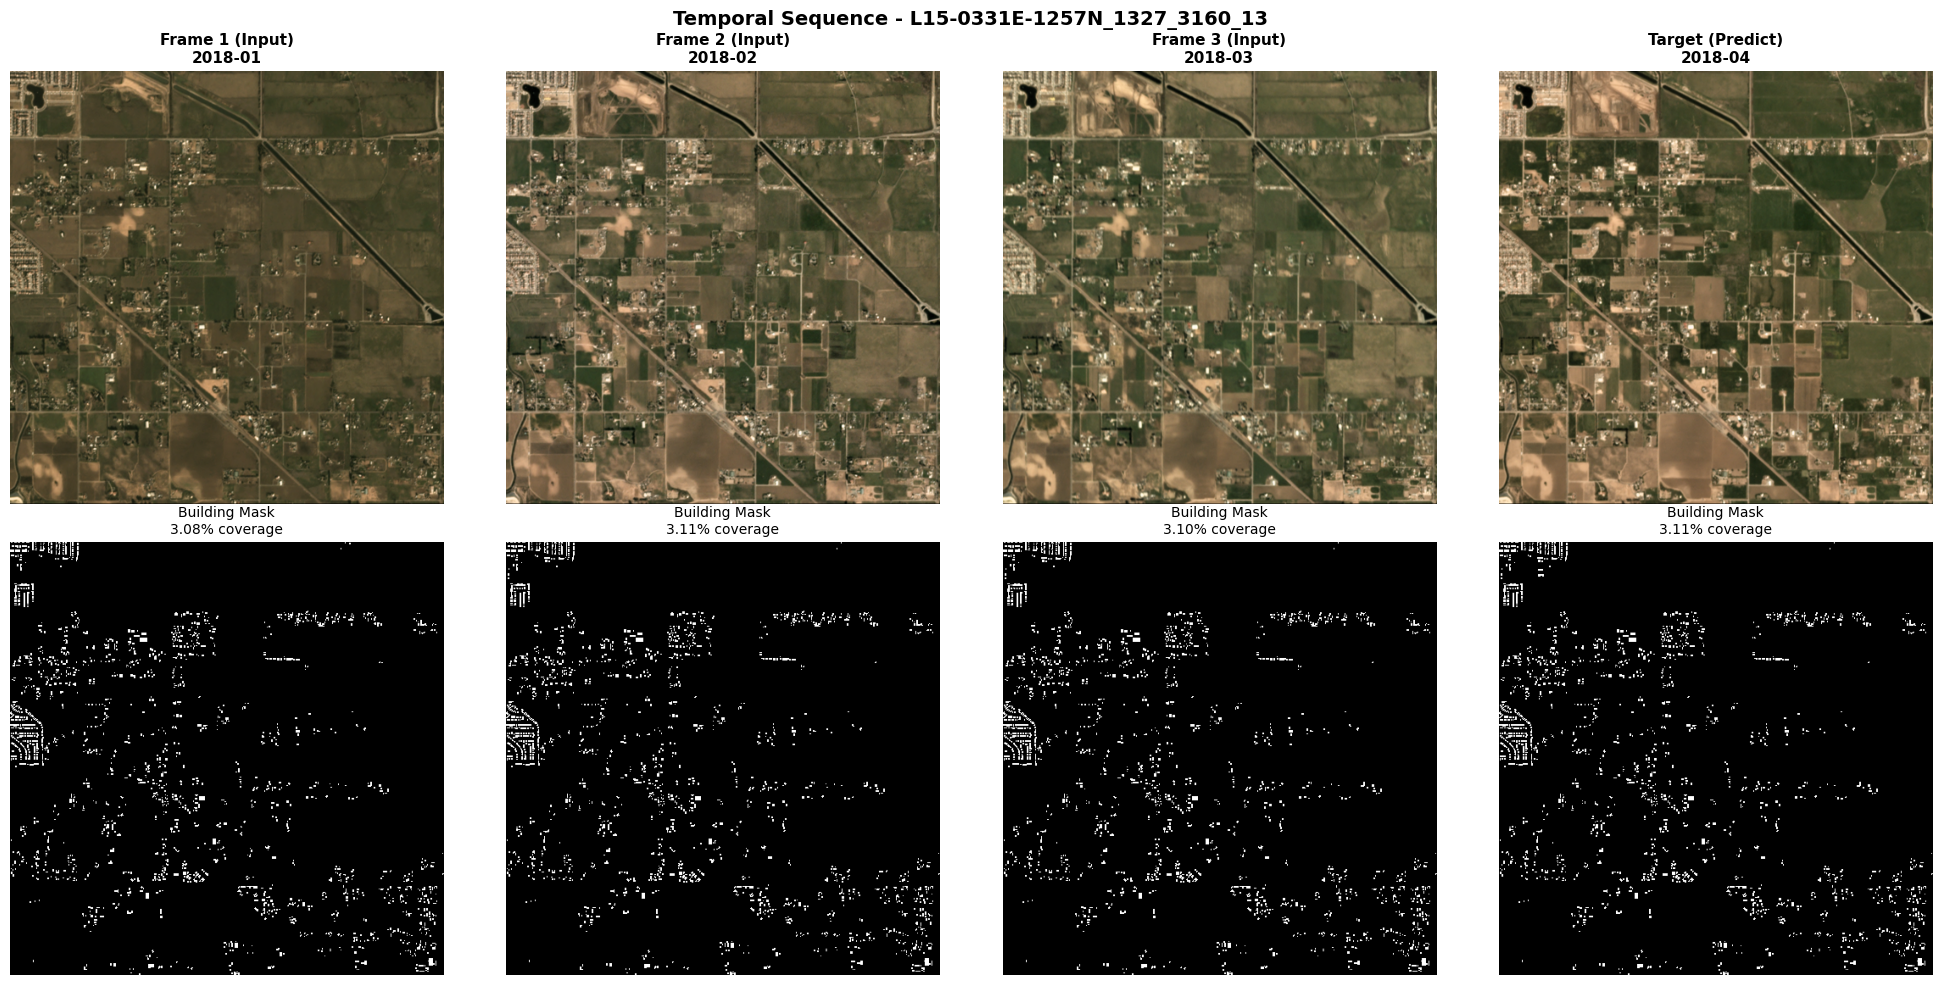


2️⃣ Visualizing RGB + Building Mask Overlay



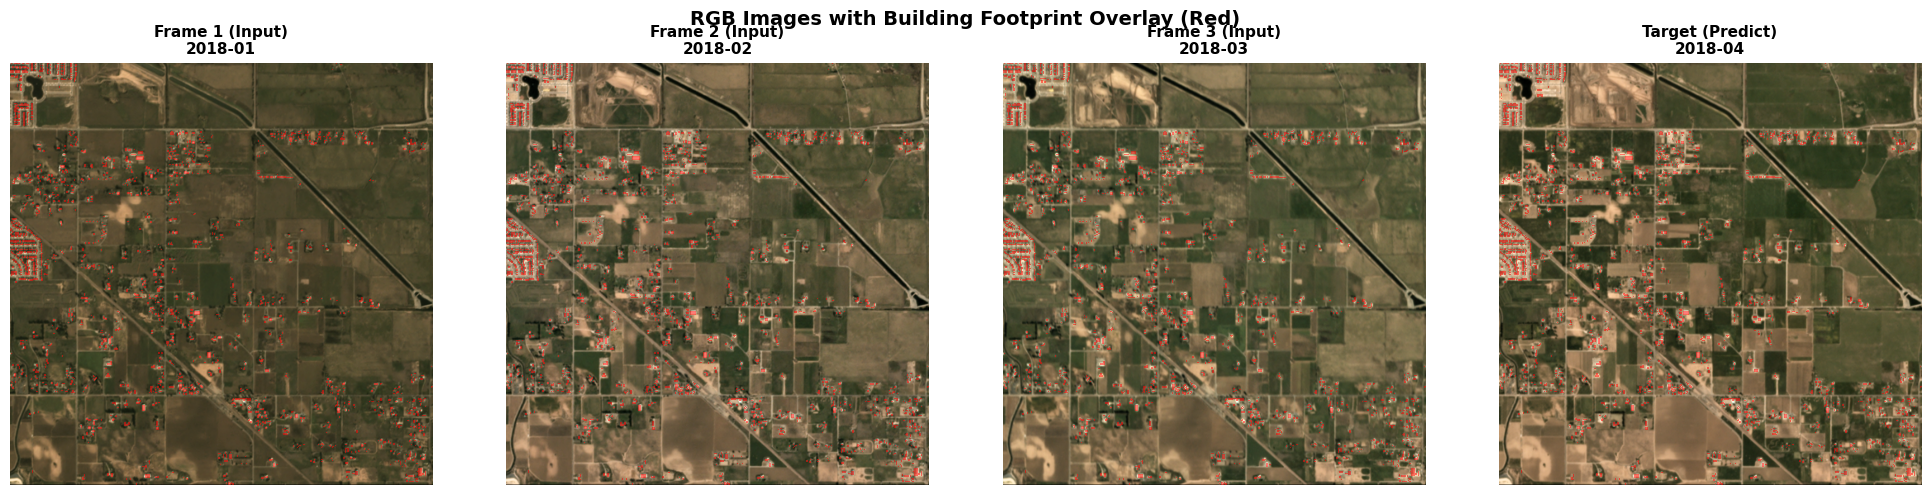


3️⃣ Building Coverage Statistics

   2018-01: 8,083 building pixels (3.08% coverage)
   2018-02: 8,141 building pixels (3.11% coverage)
   2018-03: 8,128 building pixels (3.10% coverage)
   2018-04: 8,163 building pixels (3.11% coverage)

   Building Changes (pixel-level):
   Frame1 → Frame2: 72.0 changed pixels
   Frame2 → Frame3: 15.0 changed pixels
   Frame3 → Target: 35.0 changed pixels

4️⃣ Comparing images/ vs images_masked/ (First Frame)



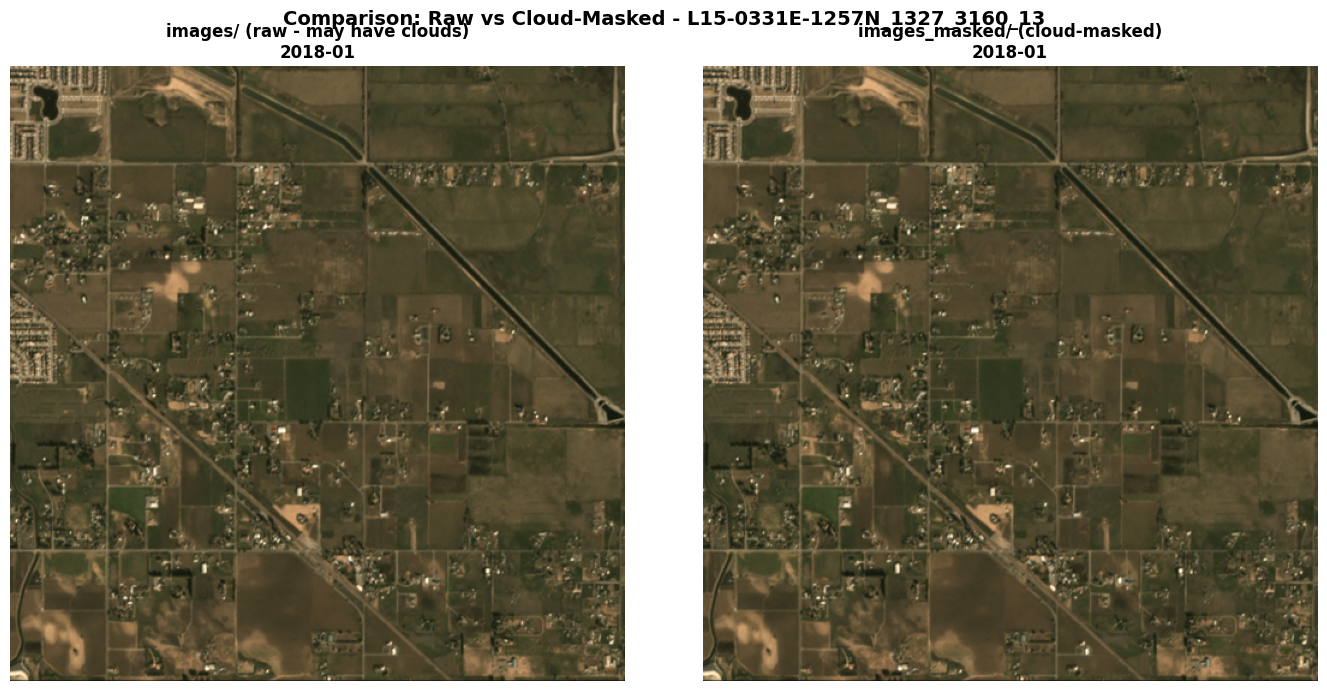

   ✅ Comparison shown for 2018-01
   💡 Recommendation: Use images_masked/ for cleaner training

✅ DATA FORMAT VERIFICATION

📸 RGB Images:
   Shape: (3, 512, 512)
   Bands: 3 (RGB)
   Size: 512×512
   Data type: uint8
   Value range: [10, 255]
   ✅ Ready for: img = img / 255.0  # Normalize to [0,1]

🏢 Building Masks:
   Shape: (512, 512)
   Data type: float32
   Value range: [0.000, 1.000]
   Unique values: [0. 1.]
   ✅ Already normalized to [0, 1]

✅ VISUALIZATION COMPLETE!

💡 Key Takeaways:
   1. RGB images: uint8 [0-255] → normalize to [0,1] during training
   2. Masks: float32 [0,1] → ready to use directly
   3. Building coverage varies: ~2-5% typically
   4. Temporal changes visible in masks (urban development)
   5. Use images_masked/ for cleaner results (no clouds)


In [ ]:
# Cell 8: Visualize Preprocessed Data (RGB + Masks)
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

output_base = Path('/content/drive/MyDrive/spacenet7_preprocessed_gan')
csv_path = output_base / 'sequences_metadata.csv'

print(f"{'='*70}")
print(f"📸 VISUALIZING PREPROCESSED DATA")
print(f"{'='*70}\n")

# Load metadata
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} sequences from CSV\n")

# =========================================================================
# 1. VISUALIZE ONE COMPLETE TEMPORAL SEQUENCE
# =========================================================================
print(f"1️⃣ Visualizing Complete Temporal Sequence (3 inputs + 1 target)\n")

# Pick first sequence
seq = df.iloc[0]
print(f"   AOI: {seq['aoi_id']}")
print(f"   Dates: {seq['frame1_date']} → {seq['frame2_date']} → {seq['frame3_date']} → {seq['target_date']}")
print(f"   Temporal gaps: {seq['delta1_months']}mo, {seq['delta2_months']}mo\n")

# Load RGB images
rgb_paths = [
    output_base / seq['frame1_rgb'],
    output_base / seq['frame2_rgb'],
    output_base / seq['frame3_rgb'],
    output_base / seq['target_rgb']
]

rgbs = []
for path in rgb_paths:
    with rasterio.open(path) as src:
        img = src.read([1,2,3])  # Read RGB bands
        img = np.transpose(img, (1,2,0))  # Convert to (H,W,C)
        rgbs.append(img)

# Load building masks
mask_paths = [
    output_base / seq['frame1_mask'],
    output_base / seq['frame2_mask'],
    output_base / seq['frame3_mask'],
    output_base / seq['target_mask']
]

masks = []
for path in mask_paths:
    mask = np.load(path)
    masks.append(mask)

# Visualize
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
dates = [seq['frame1_date'], seq['frame2_date'], seq['frame3_date'], seq['target_date']]
labels = ['Frame 1 (Input)', 'Frame 2 (Input)', 'Frame 3 (Input)', 'Target (Predict)']

for col, (rgb, mask, date, label) in enumerate(zip(rgbs, masks, dates, labels)):
    # Top row: RGB images
    axes[0, col].imshow(rgb)
    axes[0, col].set_title(f'{label}\n{date}', fontsize=11, fontweight='bold')
    axes[0, col].axis('off')

    # Bottom row: Building masks
    axes[1, col].imshow(mask, cmap='gray', vmin=0, vmax=1)
    building_pct = (mask > 0).sum() / mask.size * 100
    axes[1, col].set_title(f'Building Mask\n{building_pct:.2f}% coverage', fontsize=10)
    axes[1, col].axis('off')

plt.suptitle(f'Temporal Sequence - {seq["aoi_id"]}', fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# =========================================================================
# 2. VISUALIZE RGB + MASK OVERLAY
# =========================================================================
print(f"\n2️⃣ Visualizing RGB + Building Mask Overlay\n")

# Create overlay (RGB with semi-transparent mask)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for col, (rgb, mask, date, label) in enumerate(zip(rgbs, masks, dates, labels)):
    # Create RGBA overlay
    overlay = rgb.copy().astype(np.float32) / 255.0

    # Create red mask overlay
    mask_rgba = np.zeros((*mask.shape, 4))
    mask_rgba[:, :, 0] = mask  # Red channel
    mask_rgba[:, :, 3] = mask * 0.5  # Alpha channel (50% transparency)

    axes[col].imshow(overlay)
    axes[col].imshow(mask_rgba, interpolation='none')
    axes[col].set_title(f'{label}\n{date}', fontsize=11, fontweight='bold')
    axes[col].axis('off')

plt.suptitle('RGB Images with Building Footprint Overlay (Red)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# =========================================================================
# 3. MASK STATISTICS ACROSS SEQUENCE
# =========================================================================
print(f"\n3️⃣ Building Coverage Statistics\n")

for i, (mask, date) in enumerate(zip(masks, dates)):
    building_pixels = (mask > 0).sum()
    total_pixels = mask.size
    coverage_pct = building_pixels / total_pixels * 100

    print(f"   {date}: {building_pixels:,} building pixels ({coverage_pct:.2f}% coverage)")

# Calculate change
mask_change_1_2 = np.abs(masks[1] - masks[0]).sum()
mask_change_2_3 = np.abs(masks[2] - masks[1]).sum()
mask_change_3_target = np.abs(masks[3] - masks[2]).sum()

print(f"\n   Building Changes (pixel-level):")
print(f"   Frame1 → Frame2: {mask_change_1_2:,} changed pixels")
print(f"   Frame2 → Frame3: {mask_change_2_3:,} changed pixels")
print(f"   Frame3 → Target: {mask_change_3_target:,} changed pixels")

# =========================================================================
# 4. COMPARE images/ vs images_masked/ (Optional)
# =========================================================================
print(f"\n4️⃣ Comparing images/ vs images_masked/ (First Frame)\n")

# Check if images/ folder exists
images_dir = output_base / seq['aoi_id'] / 'images'
images_masked_dir = output_base / seq['aoi_id'] / 'images_masked'

if images_dir.exists():
    # Load same month from both folders
    date_file = seq['frame1_date'].replace('-', '_') + '.tif'

    img_raw_path = images_dir / date_file
    img_masked_path = images_masked_dir / date_file

    if img_raw_path.exists() and img_masked_path.exists():
        with rasterio.open(img_raw_path) as src:
            img_raw = src.read([1,2,3])
            img_raw = np.transpose(img_raw, (1,2,0))

        with rasterio.open(img_masked_path) as src:
            img_masked = src.read([1,2,3])
            img_masked = np.transpose(img_masked, (1,2,0))

        # Visualize comparison
        fig, axes = plt.subplots(1, 2, figsize=(14, 7))

        axes[0].imshow(img_raw)
        axes[0].set_title(f'images/ (raw - may have clouds)\n{seq["frame1_date"]}', fontsize=12, fontweight='bold')
        axes[0].axis('off')

        axes[1].imshow(img_masked)
        axes[1].set_title(f'images_masked/ (cloud-masked)\n{seq["frame1_date"]}', fontsize=12, fontweight='bold')
        axes[1].axis('off')

        plt.suptitle(f'Comparison: Raw vs Cloud-Masked - {seq["aoi_id"]}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

        print(f"   ✅ Comparison shown for {seq['frame1_date']}")
        print(f"   💡 Recommendation: Use images_masked/ for cleaner training")
    else:
        print(f"   ⚠️  Could not find matching files for comparison")
else:
    print(f"   ⚠️  images/ folder not found (only images_masked processed)")

# =========================================================================
# 5. VERIFY DATA FORMATS
# =========================================================================
print(f"\n{'='*70}")
print(f"✅ DATA FORMAT VERIFICATION")
print(f"{'='*70}\n")

# RGB format
print(f"📸 RGB Images:")
with rasterio.open(output_base / seq['frame1_rgb']) as src:
    print(f"   Shape: ({src.count}, {src.height}, {src.width})")
    print(f"   Bands: {src.count} (RGB)")
    print(f"   Size: {src.height}×{src.width}")
    print(f"   Data type: {src.dtypes[0]}")

    data = src.read()
    print(f"   Value range: [{data.min()}, {data.max()}]")
    print(f"   ✅ Ready for: img = img / 255.0  # Normalize to [0,1]")

# Mask format
print(f"\n🏢 Building Masks:")
mask_sample = np.load(output_base / seq['frame1_mask'])
print(f"   Shape: {mask_sample.shape}")
print(f"   Data type: {mask_sample.dtype}")
print(f"   Value range: [{mask_sample.min():.3f}, {mask_sample.max():.3f}]")
print(f"   Unique values: {np.unique(mask_sample)}")
print(f"   ✅ Already normalized to [0, 1]")

print(f"\n{'='*70}")
print(f"✅ VISUALIZATION COMPLETE!")
print(f"{'='*70}")
print(f"\n💡 Key Takeaways:")
print(f"   1. RGB images: uint8 [0-255] → normalize to [0,1] during training")
print(f"   2. Masks: float32 [0,1] → ready to use directly")
print(f"   3. Building coverage varies: ~2-5% typically")
print(f"   4. Temporal changes visible in masks (urban development)")
print(f"   5. Use images_masked/ for cleaner results (no clouds)")

In [ ]:
# Cell 9: Final Dataset Statistics and Summary
import numpy as np
import pandas as pd
from pathlib import Path
import json

output_base = Path('/content/drive/MyDrive/spacenet7_preprocessed_gan')

print(f"{'='*70}")
print(f"📊 FINAL DATASET STATISTICS & SUMMARY")
print(f"{'='*70}\n")

# =========================================================================
# 1. FOLDER STRUCTURE VERIFICATION
# =========================================================================
print(f"1️⃣ Verifying Complete Folder Structure\n")

area_dirs = sorted([d for d in output_base.iterdir() if d.is_dir()])
print(f"   Total AOI folders: {len(area_dirs)}\n")

# Check first area in detail
sample_area = area_dirs[0]
print(f"   Sample AOI: {sample_area.name}")
print(f"   Expected folders:\n")

expected_folders = {
    'images': 'Raw RGB images (512×512, .tif)',
    'images_masked': 'Cloud-masked RGB images (512×512, .tif)',
    'building_masks': 'Binary building masks (512×512, .npy)',
    'labels': 'Original GeoJSON labels',
    'labels_match': 'Original GeoJSON with IDs',
    'labels_match_pix': 'Original GeoJSON in pixel coords'
}

folder_status = {}
for folder_name, description in expected_folders.items():
    folder_path = sample_area / folder_name
    if folder_path.exists():
        files = list(folder_path.glob('*'))
        folder_status[folder_name] = len(files)
        file_ext = files[0].suffix if files else 'N/A'
        print(f"     ✅ {folder_name:20s}: {len(files):3d} files ({file_ext}) - {description}")
    else:
        folder_status[folder_name] = 0
        print(f"     ❌ {folder_name:20s}: NOT FOUND")

# =========================================================================
# 2. COUNT ALL FILES ACROSS DATASET
# =========================================================================
print(f"\n{'='*70}")
print(f"2️⃣ Complete Dataset File Counts\n")

total_counts = {
    'images': 0,
    'images_masked': 0,
    'building_masks': 0,
    'labels': 0,
    'labels_match': 0,
    'labels_match_pix': 0
}

for area in area_dirs:
    for folder_name in total_counts.keys():
        folder_path = area / folder_name
        if folder_path.exists():
            if folder_name == 'building_masks':
                total_counts[folder_name] += len(list(folder_path.glob('*.npy')))
            elif folder_name in ['images', 'images_masked']:
                total_counts[folder_name] += len(list(folder_path.glob('*.tif')))
            else:
                total_counts[folder_name] += len(list(folder_path.glob('*.geojson')))

print(f"   📸 RGB Images:")
print(f"      images/ folder:        {total_counts['images']:4d} files")
print(f"      images_masked/ folder: {total_counts['images_masked']:4d} files")
print(f"      Total RGB images:      {total_counts['images'] + total_counts['images_masked']:4d} files")

print(f"\n   🏢 Building Masks:")
print(f"      building_masks/ folder: {total_counts['building_masks']:4d} files (.npy)")

print(f"\n   📄 Label Files (GeoJSON):")
print(f"      labels/ folder:         {total_counts['labels']:4d} files")
print(f"      labels_match/ folder:   {total_counts['labels_match']:4d} files")
print(f"      labels_match_pix/:      {total_counts['labels_match_pix']:4d} files")
print(f"      Total label files:      {total_counts['labels'] + total_counts['labels_match'] + total_counts['labels_match_pix']:4d} files")

# =========================================================================
# 3. CALCULATE TOTAL DATASET SIZE
# =========================================================================
print(f"\n{'='*70}")
print(f"3️⃣ Dataset Storage Statistics\n")

folder_sizes = {
    'images': 0,
    'images_masked': 0,
    'building_masks': 0,
    'labels': 0,
    'labels_match': 0,
    'labels_match_pix': 0
}

total_size = 0

for area in area_dirs:
    for folder_name in folder_sizes.keys():
        folder_path = area / folder_name
        if folder_path.exists():
            for file in folder_path.rglob('*'):
                if file.is_file():
                    size = file.stat().st_size
                    folder_sizes[folder_name] += size
                    total_size += size

# Convert to GB
total_size_gb = total_size / (1024**3)

print(f"   💾 Storage by Folder Type:")
for folder_name, size in folder_sizes.items():
    size_gb = size / (1024**3)
    percentage = (size / total_size * 100) if total_size > 0 else 0
    print(f"      {folder_name:20s}: {size_gb:6.2f} GB ({percentage:5.1f}%)")

print(f"\n   💾 Total Dataset Size: {total_size_gb:.2f} GB")
print(f"   💾 Average per AOI: {total_size_gb/len(area_dirs):.3f} GB")

# =========================================================================
# 4. SEQUENCES METADATA STATISTICS
# =========================================================================
print(f"\n{'='*70}")
print(f"4️⃣ Temporal Sequences Statistics\n")

csv_path = output_base / 'sequences_metadata.csv'
df = pd.read_csv(csv_path)

print(f"   📄 Metadata CSV: {csv_path.name}")
print(f"   📊 Total sequences: {len(df)}")
print(f"   📊 Unique AOIs: {df['aoi_id'].nunique()}")
print(f"   📊 Sequences per AOI:")
print(f"      Average: {len(df) / df['aoi_id'].nunique():.1f}")
print(f"      Min: {df.groupby('aoi_id').size().min()}")
print(f"      Max: {df.groupby('aoi_id').size().max()}")

print(f"\n   ⏱️  Temporal Delta Statistics:")
print(f"      delta1_months: min={df['delta1_months'].min()}, max={df['delta1_months'].max()}, mean={df['delta1_months'].mean():.2f}")
print(f"      delta2_months: min={df['delta2_months'].min()}, max={df['delta2_months'].max()}, mean={df['delta2_months'].mean():.2f}")
print(f"      Most common gap: {df['delta1_months'].mode()[0]} month(s)")

# =========================================================================
# 5. TRAIN/VAL/TEST SPLIT INFO
# =========================================================================
print(f"\n{'='*70}")
print(f"5️⃣ Suggested Train/Val/Test Split\n")

split_path = output_base / 'suggested_split.json'
if split_path.exists():
    with open(split_path, 'r') as f:
        split_info = json.load(f)

    train_aois = set(split_info['train_aois'])
    val_aois = set(split_info['val_aois'])
    test_aois = set(split_info['test_aois'])

    train_seqs = df[df['aoi_id'].isin(train_aois)]
    val_seqs = df[df['aoi_id'].isin(val_aois)]
    test_seqs = df[df['aoi_id'].isin(test_aois)]

    print(f"   📊 Split by AOI (prevents data leakage):")
    print(f"      Train: {len(train_aois):2d} AOIs ({len(train_seqs):4d} sequences, {len(train_seqs)/len(df)*100:5.1f}%)")
    print(f"      Val:   {len(val_aois):2d} AOIs ({len(val_seqs):4d} sequences, {len(val_seqs)/len(df)*100:5.1f}%)")
    print(f"      Test:  {len(test_aois):2d} AOIs ({len(test_seqs):4d} sequences, {len(test_seqs)/len(df)*100:5.1f}%)")

    print(f"\n   💡 Load split info:")
    print(f"      import json")
    print(f"      with open('{split_path}', 'r') as f:")
    print(f"          split_info = json.load(f)")

# =========================================================================
# 6. MASK STATISTICS (BUILDING COVERAGE)
# =========================================================================
print(f"\n{'='*70}")
print(f"6️⃣ Building Mask Statistics (Sample Analysis)\n")

# Sample 50 random masks
sample_masks = []
sample_size = min(50, len(area_dirs) * 5)

print(f"   Analyzing {sample_size} random masks...\n")

mask_coverages = []
for area in area_dirs[:10]:  # Sample first 10 areas
    masks_dir = area / 'building_masks'
    if masks_dir.exists():
        mask_files = list(masks_dir.glob('*.npy'))[:5]
        for mask_file in mask_files:
            mask = np.load(mask_file)
            coverage = (mask > 0).sum() / mask.size * 100
            mask_coverages.append(coverage)

if mask_coverages:
    print(f"   🏢 Building Coverage Statistics:")
    print(f"      Mean: {np.mean(mask_coverages):.2f}%")
    print(f"      Median: {np.median(mask_coverages):.2f}%")
    print(f"      Min: {np.min(mask_coverages):.2f}%")
    print(f"      Max: {np.max(mask_coverages):.2f}%")
    print(f"      Std Dev: {np.std(mask_coverages):.2f}%")

# =========================================================================
# 7. FINAL SUMMARY
# =========================================================================
print(f"\n{'='*70}")
print(f"✅ PREPROCESSING COMPLETE - FINAL SUMMARY")
print(f"{'='*70}\n")

print(f"📂 Output Location:")
print(f"   {output_base}\n")

print(f"📊 Dataset Composition:")
print(f"   ✅ 60 Areas (AOIs)")
print(f"   ✅ {total_counts['images'] + total_counts['images_masked']:,} RGB images (512×512)")
print(f"   ✅ {total_counts['building_masks']:,} building masks (512×512)")
print(f"   ✅ {len(df):,} temporal sequences (3 inputs → 1 target)")
print(f"   ✅ {total_counts['labels'] + total_counts['labels_match'] + total_counts['labels_match_pix']:,} GeoJSON label files")
print(f"   ✅ {total_size_gb:.2f} GB total size\n")

print(f"📁 Folder Structure per AOI:")
print(f"   ├── images/              ({folder_status.get('images', 0)} files - raw RGB)")
print(f"   ├── images_masked/       ({folder_status.get('images_masked', 0)} files - cloud-masked RGB)")
print(f"   ├── building_masks/      ({folder_status.get('building_masks', 0)} files - binary masks)")
print(f"   ├── labels/              ({folder_status.get('labels', 0)} files - GeoJSON)")
print(f"   ├── labels_match/        ({folder_status.get('labels_match', 0)} files - GeoJSON)")
print(f"   └── labels_match_pix/    ({folder_status.get('labels_match_pix', 0)} files - GeoJSON)\n")

print(f"📄 Metadata Files:")
print(f"   ✅ sequences_metadata.csv - {len(df)} sequences with all paths")
print(f"   ✅ suggested_split.json - 70/15/15 train/val/test split by AOI\n")

print(f"🎯 Ready for GAN Training:")
print(f"   1. Load sequences from: sequences_metadata.csv")
print(f"   2. RGB images: Load .tif, normalize: img / 255.0 → [0,1]")
print(f"   3. Masks: Load .npy, already [0,1] (1=building, 0=background)")
print(f"   4. Split data using: suggested_split.json")
print(f"   5. Use images_masked/ for cleaner results (recommended)\n")

print(f"{'='*70}")
print(f"🎉 PREPROCESSING PIPELINE COMPLETE!")
print(f"{'='*70}\n")

print(f"💡 Next Steps for GAN Team:")
print(f"   1. Create PyTorch/TensorFlow data loader using CSV")
print(f"   2. Implement conditional GAN with:")
print(f"      - RGB inputs: [B, 3, 3, H, W]")
print(f"      - Mask inputs: [B, 3, 1, H, W]")
print(f"      - Outputs: RGB [B, 3, H, W] + Mask [B, 1, H, W]")
print(f"   3. Use suggested losses:")
print(f"      - GAN loss (adversarial)")
print(f"      - L1 pixel loss")
print(f"      - Perceptual loss (ViT/VGG)")
print(f"      - Segmentation loss (BCE + IoU)")
print(f"      - Temporal consistency loss")
print(f"   4. Train for 100-150 epochs")
print(f"   5. Evaluate on held-out test AOIs\n")

print(f"🔧 Troubleshooting Black Image Issue:")
print(f"   ✅ Masks are now float32 [0,1] (NOT uint8 [0,255])")
print(f"   ✅ Proper normalization prevents value mismatch")
print(f"   ✅ Use lower learning rate: 2e-4 or 1e-4")
print(f"   ✅ Balance loss weights: λ_pixel=100, λ_seg=10, λ_adv=1")
print(f"   ✅ Check discriminator isn't too strong (update ratio 1:1)\n")

print(f"{'='*70}")

📊 FINAL DATASET STATISTICS & SUMMARY

1️⃣ Verifying Complete Folder Structure

   Total AOI folders: 60

   Sample AOI: L15-0331E-1257N_1327_3160_13
   Expected folders:

     ✅ images              :  25 files (.tif) - Raw RGB images (512×512, .tif)
     ✅ images_masked       :  25 files (.tif) - Cloud-masked RGB images (512×512, .tif)
     ✅ building_masks      :  25 files (.npy) - Binary building masks (512×512, .npy)
     ✅ labels              :  50 files (.geojson) - Original GeoJSON labels
     ✅ labels_match        :  25 files (.geojson) - Original GeoJSON with IDs
     ✅ labels_match_pix    :  25 files (.geojson) - Original GeoJSON in pixel coords

2️⃣ Complete Dataset File Counts

   📸 RGB Images:
      images/ folder:        1423 files
      images_masked/ folder: 1423 files
      Total RGB images:      2846 files

   🏢 Building Masks:
      building_masks/ folder: 1423 files (.npy)

   📄 Label Files (GeoJSON):
      labels/ folder:         2846 files
      labels_match/ folde

Testing AOI: L15-0331E-1257N_1327_3160_13
Sample image: 2018_01.tif
Looking for mask: /content/drive/MyDrive/DL_Project/Dataset/SpaceNet7/Preprocessed/spacenet7_preprocessed_gan/L15-0331E-1257N_1327_3160_13/building_masks/2018_01.npy

MASK STATISTICS
Image shape: (512, 512, 3)
Mask shape: (512, 512)
Mask dtype: float32
Mask min: 0.0
Mask max: 1.0
Mask unique values: [0. 1.]
Building pixels: 8083 (3.08%)


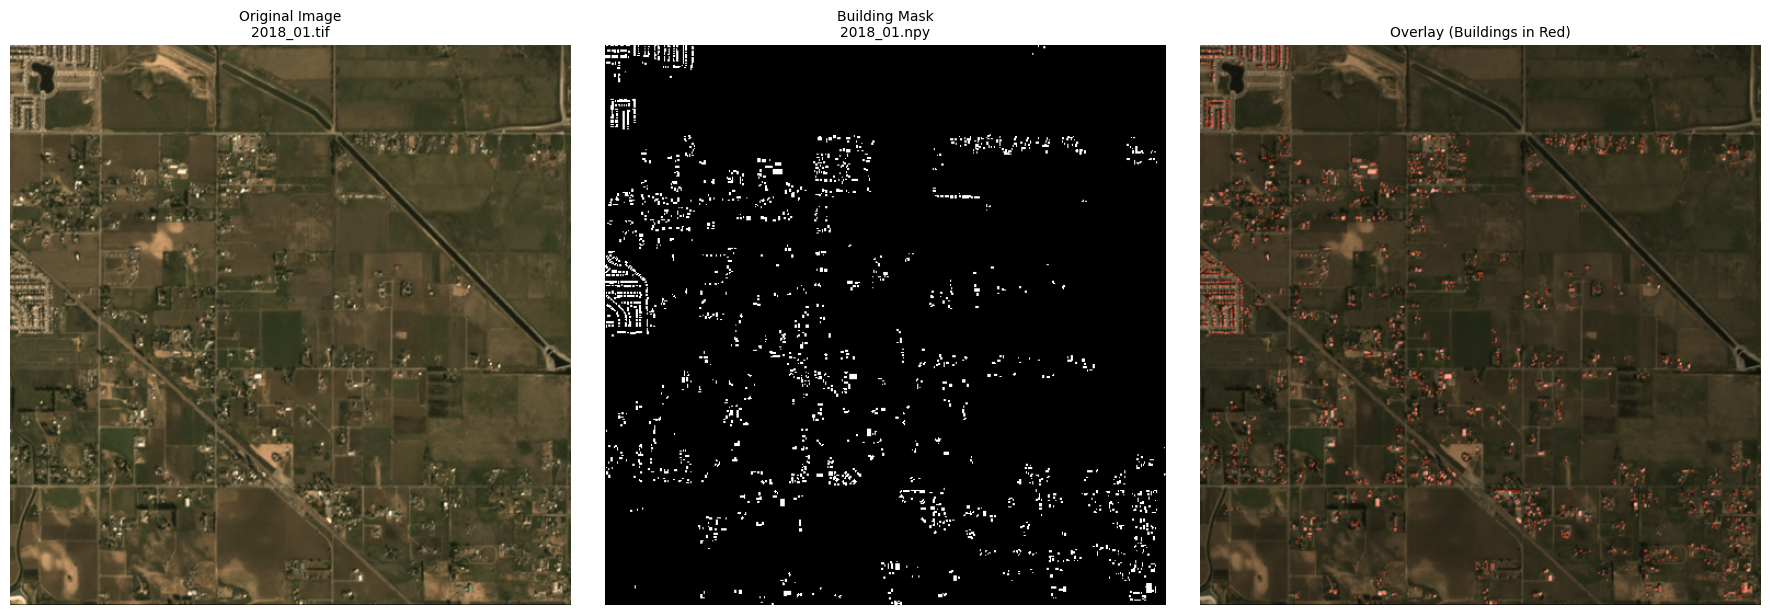


✓ Visualization saved to: /content/mask_verification.png

QUALITY CHECKS
✓ Mask dimensions match image
✓ Mask dtype is valid: float32
✓ Mask contains 8083 building pixels
✓ Mask values are in valid range


In [2]:
#testing
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

# ========== CONFIGURATION ==========
data_root = Path('/content/drive/MyDrive/DL_Project/Dataset/SpaceNet7/Preprocessed/spacenet7_preprocessed_gan')

# Pick first AOI
aoi_dirs = sorted([d for d in data_root.iterdir() if d.is_dir()])
test_aoi = aoi_dirs[0]

print(f"Testing AOI: {test_aoi.name}")

# ========== FIND MATCHING IMAGE + MASK ==========
images_dir = test_aoi / 'images_masked'
masks_dir = test_aoi / 'building_masks'  # Your folder name

# Get one image file
image_files = sorted(images_dir.glob('*.tif'))
if len(image_files) == 0:
    print("ERROR: No images found!")
else:
    sample_image_path = image_files[0]
    print(f"Sample image: {sample_image_path.name}")

    # Find corresponding mask (2020_01.npy format)
    # Extract date from image filename: global_monthly_2020_01_mosaic...
    import re
    match = re.search(r'(\d{4})_(\d{2})', sample_image_path.name)
    if match:
        year, month = match.groups()
        mask_filename = f"{year}_{month}.npy"
        mask_path = masks_dir / mask_filename

        print(f"Looking for mask: {mask_path}")

        if mask_path.exists():
            # Load image
            img = Image.open(sample_image_path).convert('RGB')
            img = np.array(img)

            # Load mask
            mask = np.load(mask_path)

            # ========== PRINT STATISTICS ==========
            print("\n" + "="*60)
            print("MASK STATISTICS")
            print("="*60)
            print(f"Image shape: {img.shape}")
            print(f"Mask shape: {mask.shape}")
            print(f"Mask dtype: {mask.dtype}")
            print(f"Mask min: {mask.min()}")
            print(f"Mask max: {mask.max()}")
            print(f"Mask unique values: {np.unique(mask)}")
            print(f"Building pixels: {(mask > 0).sum()} ({(mask > 0).sum() / mask.size * 100:.2f}%)")

            # ========== VISUALIZE ==========
            fig, axes = plt.subplots(1, 3, figsize=(18, 6))

            # Original image
            axes[0].imshow(img)
            axes[0].set_title(f'Original Image\n{sample_image_path.name}', fontsize=10)
            axes[0].axis('off')

            # Binary mask
            axes[1].imshow(mask, cmap='gray', vmin=0, vmax=1)
            axes[1].set_title(f'Building Mask\n{mask_filename}', fontsize=10)
            axes[1].axis('off')

            # Overlay (buildings in red)
            overlay = img.copy()
            if mask.max() > 0:
                # Normalize mask to [0, 1] if needed
                mask_norm = mask / mask.max()
                red_overlay = np.zeros_like(img)
                red_overlay[:, :, 0] = 255  # Red channel
                overlay = (img * 0.7 + red_overlay * mask_norm[:, :, np.newaxis] * 0.3).astype(np.uint8)

            axes[2].imshow(overlay)
            axes[2].set_title('Overlay (Buildings in Red)', fontsize=10)
            axes[2].axis('off')

            plt.tight_layout()
            plt.savefig('/content/mask_verification.png', dpi=150, bbox_inches='tight')
            plt.show()

            print("\n✓ Visualization saved to: /content/mask_verification.png")

            # ========== VALIDATE MASK QUALITY ==========
            print("\n" + "="*60)
            print("QUALITY CHECKS")
            print("="*60)

            if mask.shape != img.shape[:2]:
                print("⚠️  WARNING: Mask and image dimensions don't match!")
            else:
                print("✓ Mask dimensions match image")

            if mask.dtype not in [np.uint8, np.float32, np.float64]:
                print(f"⚠️  WARNING: Unexpected mask dtype: {mask.dtype}")
            else:
                print(f"✓ Mask dtype is valid: {mask.dtype}")

            if (mask > 0).sum() == 0:
                print("⚠️  WARNING: Mask is completely empty (no buildings detected)")
            else:
                print(f"✓ Mask contains {(mask > 0).sum()} building pixels")

            if mask.max() > 1 and mask.dtype == np.float32:
                print("⚠️  WARNING: Mask values > 1 (should be binary 0/1)")
            else:
                print("✓ Mask values are in valid range")

        else:
            print(f"ERROR: Mask not found at {mask_path}")
            print(f"Available masks: {list(masks_dir.glob('*.npy'))[:5]}")
    else:
        print("ERROR: Could not parse date from filename")